# Домашная работа. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

In [6]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


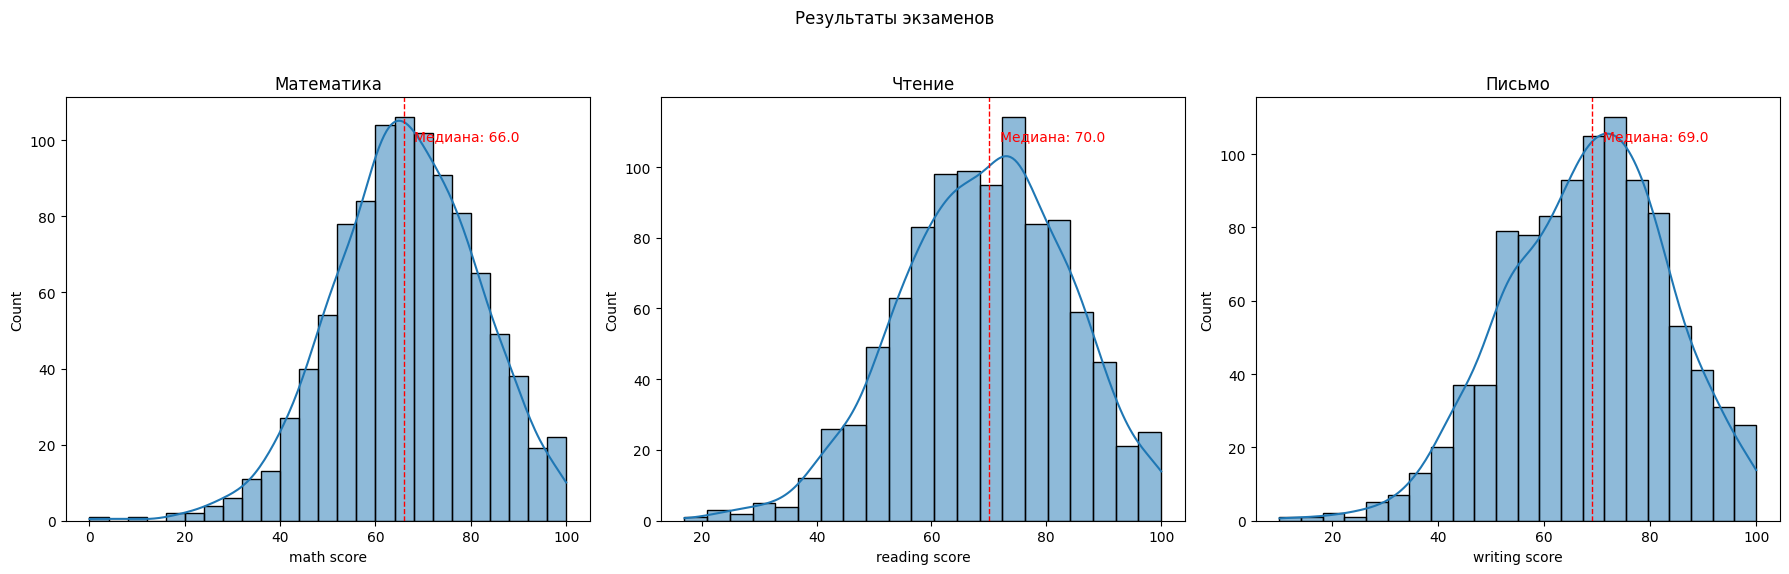

In [7]:

math_median = df['math score'].median()
reading_median = df['reading score'].median()
writing_median = df['writing score'].median()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Результаты экзаменов')

sns.histplot(df['math score'], kde=True, ax=axes[0])
axes[0].set_title('Математика')
axes[0].axvline(math_median, color='red', linestyle='dashed', linewidth=1)
axes[0].text(math_median + 2, axes[0].get_ylim()[1]*0.9, f'Медиана: {math_median}', color='red')

sns.histplot(df['reading score'], kde=True, ax=axes[1])
axes[1].set_title('Чтение')
axes[1].axvline(reading_median, color='red', linestyle='dashed', linewidth=1)
axes[1].text(reading_median + 2, axes[1].get_ylim()[1]*0.9, f'Медиана: {reading_median}', color='red')

sns.histplot(df['writing score'], kde=True, ax=axes[2])
axes[2].set_title('Письмо')
axes[2].axvline(writing_median, color='red', linestyle='dashed', linewidth=1)
axes[2].text(writing_median + 2, axes[2].get_ylim()[1]*0.9, f'Медиана: {writing_median}', color='red')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


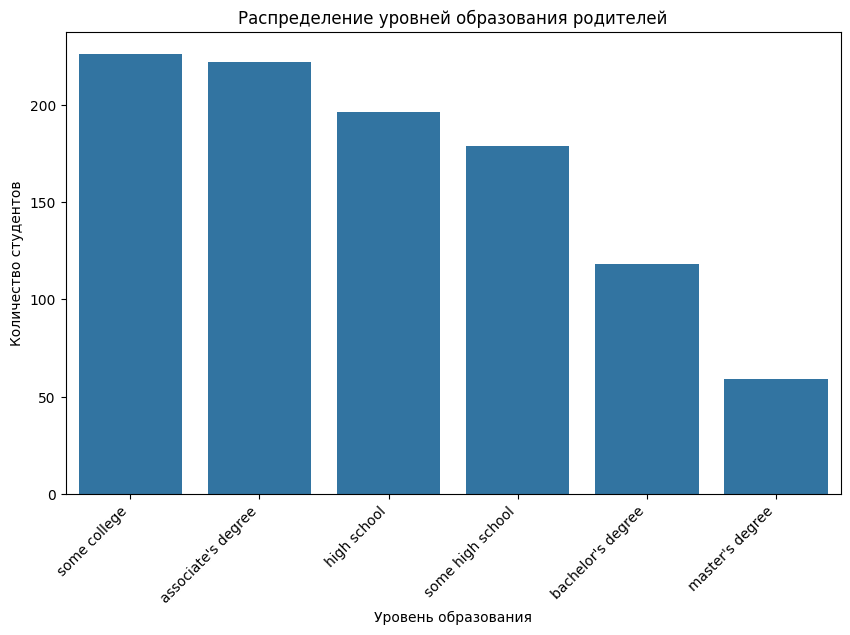

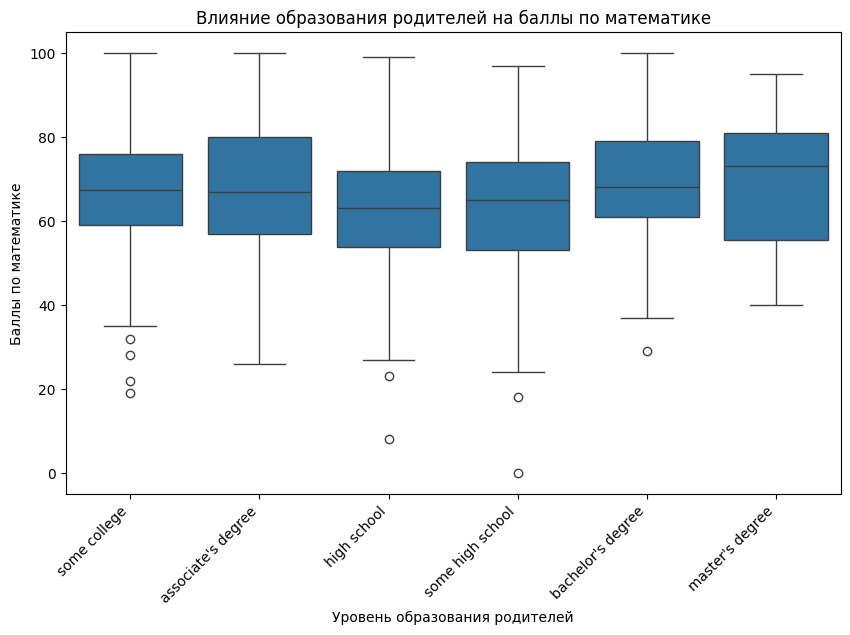

In [8]:
parental_education_counts = df['parental level of education'].value_counts()
print(parental_education_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='parental level of education', data=df, order=parental_education_counts.index)
plt.title('Распределение уровней образования родителей')
plt.xlabel('Уровень образования')
plt.ylabel('Количество студентов')
plt.xticks(rotation=45, ha='right')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='parental level of education', y='math score', data=df, order=parental_education_counts.index)
plt.title('Влияние образования родителей на баллы по математике')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Баллы по математике')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [10]:
num_female_high_scorers = len(df[(df['gender'] == 'female') &
                                 (df['math score'] > 90) &
                                 (df['reading score'] > 90) &
                                 (df['writing score'] > 90)])

print(f"Число студенток с результатом >90 по всем предметам: {num_female_high_scorers}")

Число студенток с результатом >90 по всем предметам: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [11]:
scores_by_gender = df.groupby('gender')[['math score', 'reading score', 'writing score']].agg(['min', 'max', 'median'])
scores_by_gender

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете agg())

In [12]:
scores_by_gender_lunch_test = df.groupby(['gender', 'lunch', 'test preparation course'])[['math score', 'reading score', 'writing score']].agg('mean')
scores_by_gender_lunch_test

math score  reading score  \
gender lunch        test preparation course                              
female free/reduced completed                 60.785714      73.428571   
                    none                      52.890756      63.831933   
       standard     completed                 71.131579      79.798246   
                    none                      66.530233      73.386047   
male   free/reduced completed                 65.639344      65.786885   
                    none                      60.609524      59.076190   
       standard     completed                 75.955752      72.601770   
                    none                      69.832512      64.719212   

                                             writing score  
gender lunch        test preparation course                 
female free/reduced completed                    74.371429  
                    none                         61.781513  
       standard     completed                    81.508772  
                    none                         72.967442  
male   free/reduced completed                    65.737705  
                    none                         55.285714  
       standard     completed                    71.982301  
                    none                         61.906404

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

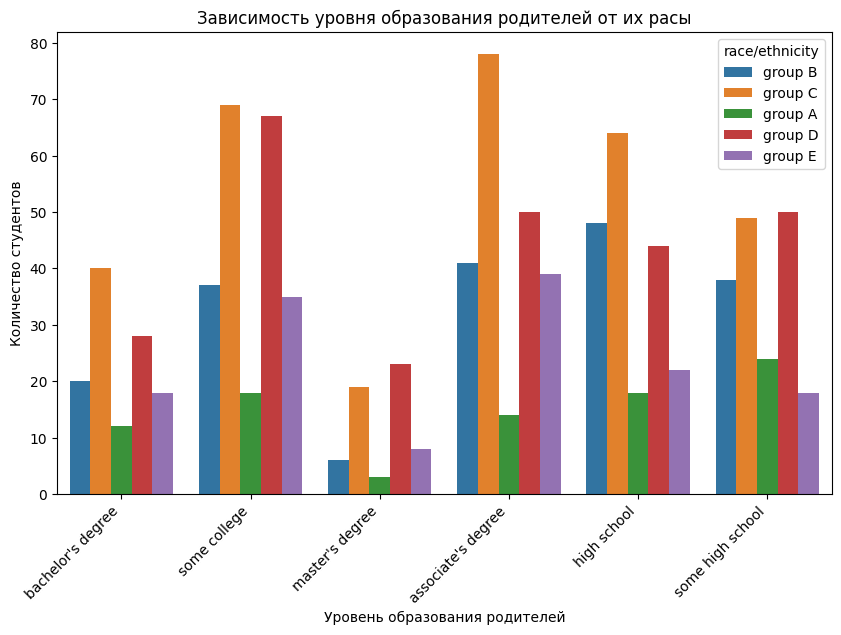

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='parental level of education', hue='race/ethnicity', data=df)
plt.title('Зависимость уровня образования родителей от их расы')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество студентов')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

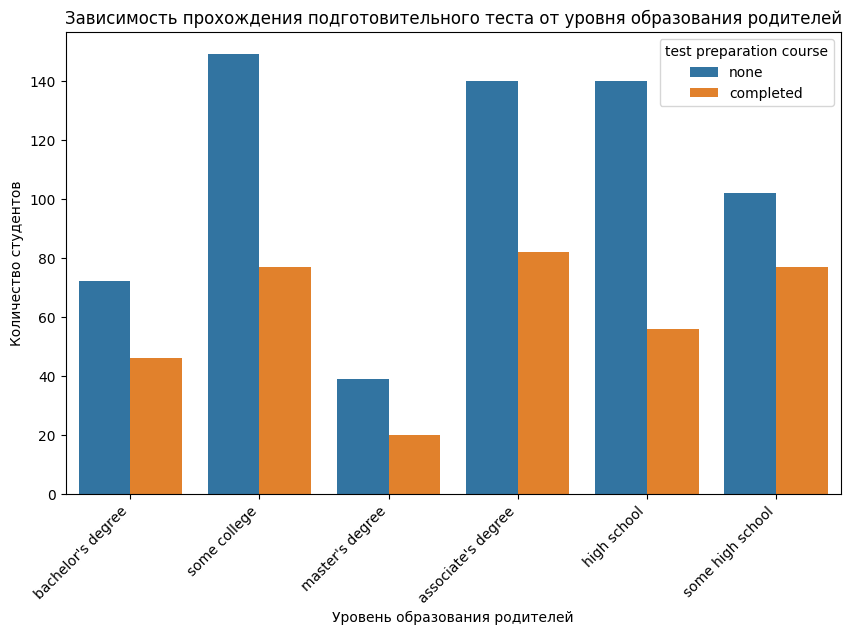

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='parental level of education', hue='test preparation course', data=df)
plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество студентов')
plt.xticks(rotation=45, ha='right')
plt.show()


#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

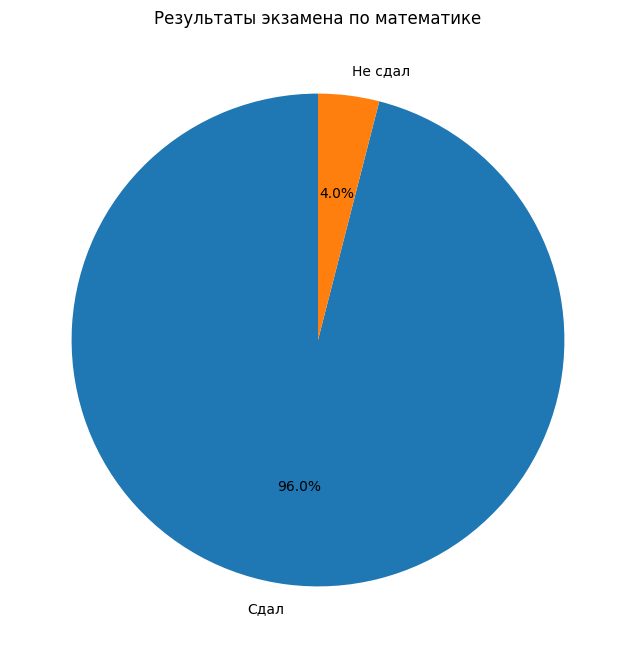

In [17]:
df['math_pass'] = df['math score'] >= 40
math_pass_counts = df['math_pass'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(math_pass_counts, labels=['Сдал', 'Не сдал'], autopct='%1.1f%%', startangle=90)
plt.title('Результаты экзамена по математике')
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

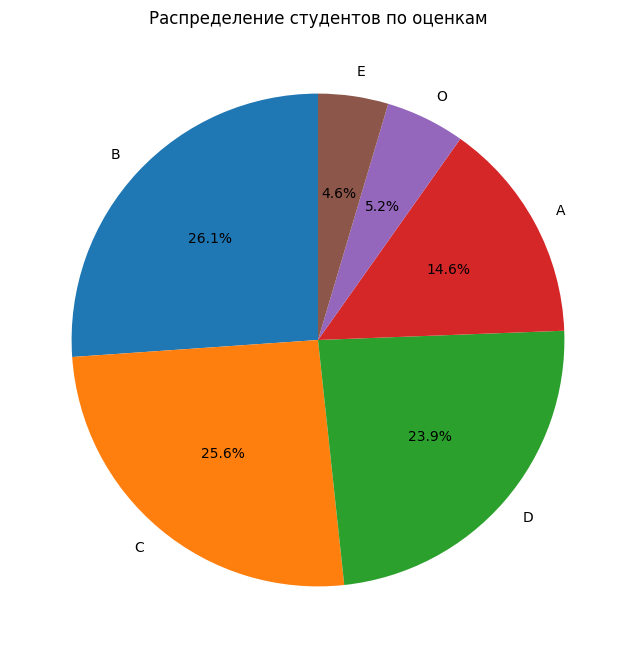

In [21]:
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

def assign_grade(row):
    if row['math score'] < 40:
        return 'E'
    elif row['average_score'] < 40:
        return 'E'
    elif row['average_score'] < 60:
        return 'D'
    elif row['average_score'] < 70:
        return 'C'
    elif row['average_score'] < 80:
        return 'B'
    elif row['average_score'] < 90:
        return 'A'
    else:
        return 'O'

df['grade'] = df.apply(assign_grade, axis=1)

grade_counts = df['grade'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение студентов по оценкам')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

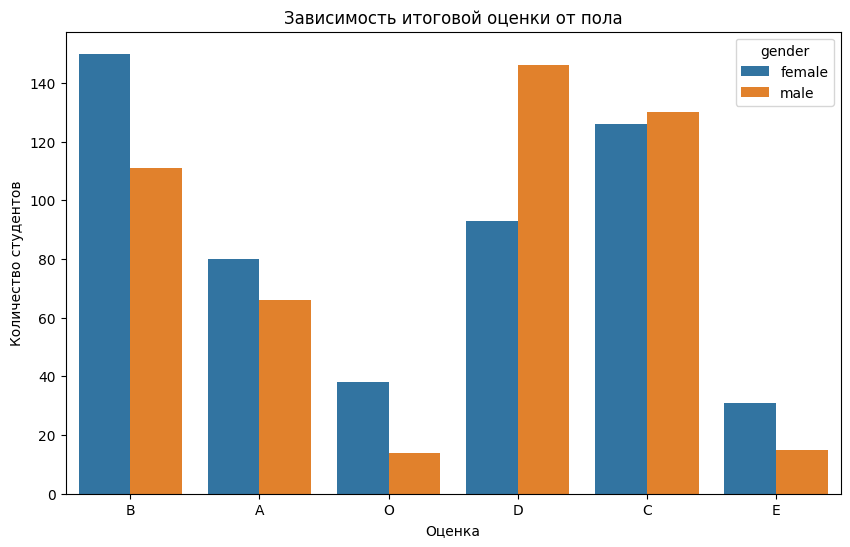

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='gender', data=df)
plt.title('Зависимость итоговой оценки от пола')
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')
plt.show()